In [ ]:
import pandas as pd
import numpy as np

# Fetch the Boston housing dataset from the original source
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Create a pandas DataFrame
data = pd.DataFrame(data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
data['MEDV'] = target

print(data.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
# Display summary statistics
print(data.describe())


             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [ ]:
print(data.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


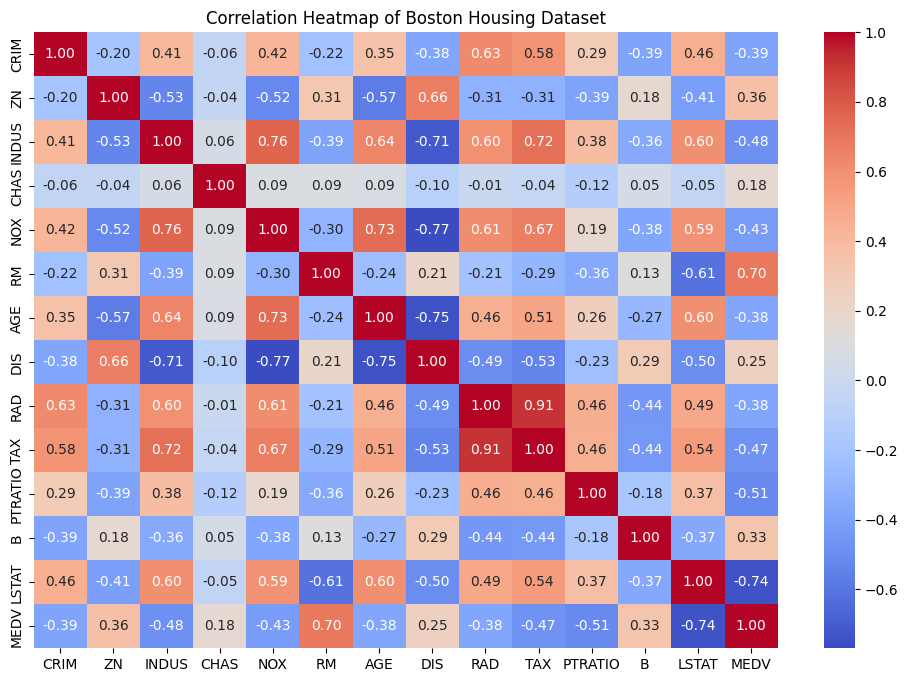

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Boston Housing Dataset')
plt.show()


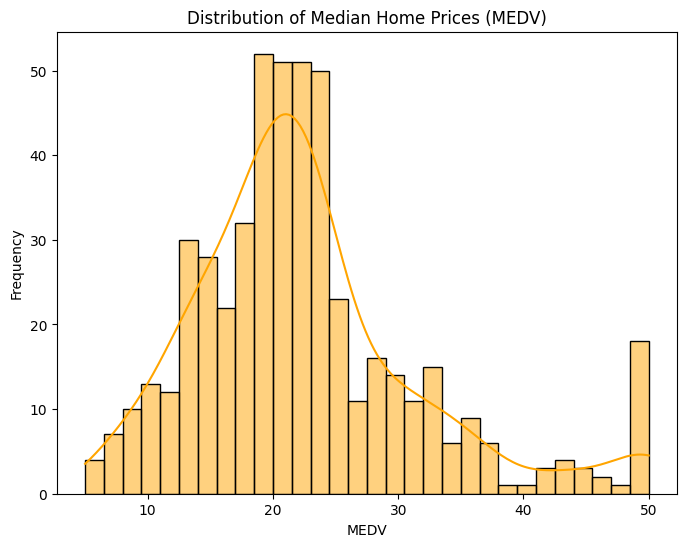

In [8]:
plt.figure(figsize=(8, 6))
sns.histplot(data['MEDV'], bins=30, kde=True, color='orange')
plt.title('Distribution of Median Home Prices (MEDV)')
plt.xlabel('MEDV')
plt.ylabel('Frequency')
plt.show()


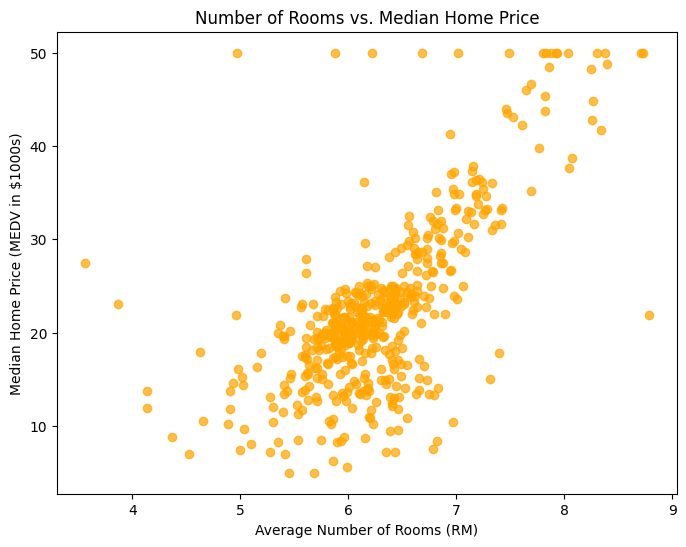

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(data['RM'], data['MEDV'], alpha=0.7, color='orange')
plt.title('Number of Rooms vs. Median Home Price')
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('Median Home Price (MEDV in $1000s)')
plt.show()


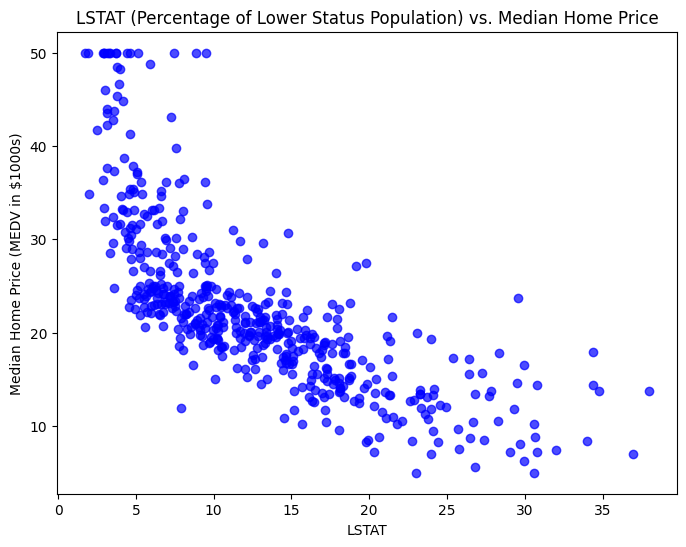

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(data['LSTAT'], data['MEDV'], alpha=0.7, color='blue')
plt.title('LSTAT (Percentage of Lower Status Population) vs. Median Home Price')
plt.xlabel('LSTAT')
plt.ylabel('Median Home Price (MEDV in $1000s)')
plt.show()


In [11]:
# Features and target variable
X = data.drop('MEDV', axis=1)
y = data['MEDV']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Initialize the scaler
scaler = StandardScaler()

# Fit only on training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluation
print("Linear Regression Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R^2 Score:", r2_score(y_test, y_pred_lr))


Linear Regression Performance:
MAE: 3.189091965887848
MSE: 24.291119474973513
R^2 Score: 0.668759493535632


In [14]:
# Train the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluation
print("Decision Tree Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("R^2 Score:", r2_score(y_test, y_pred_dt))


Decision Tree Performance:
MAE: 2.394117647058824
MSE: 10.416078431372549
R^2 Score: 0.8579634380978161


In [15]:
# Train the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluation
print("Decision Tree Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("R^2 Score:", r2_score(y_test, y_pred_dt))


Decision Tree Performance:
MAE: 2.394117647058824
MSE: 10.416078431372549
R^2 Score: 0.8579634380978161


In [16]:
# Set up the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)

# Best parameters and model
best_rf_model = grid_search.best_estimator_

# Predictions
y_pred_rf = best_rf_model.predict(X_test_scaled)

# Evaluation
print("Random Forest Performance with Hyperparameter Tuning:")
print("Best Parameters:", grid_search.best_params_)
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R^2 Score:", r2_score(y_test, y_pred_rf))


Random Forest Performance with Hyperparameter Tuning:
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
MAE: 2.041078431372549
MSE: 7.912745333333333
R^2 Score: 0.8920995891343227


In [17]:
import pickle

# Save the Random Forest model
with open('best_rf_model.pkl', 'wb') as file:
    pickle.dump(best_rf_model, file)

# Save the scaler for consistent feature scaling
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)
